# Изучение закономерностей, определяющих успешность игр

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Составление-портрета-пользователя-каждого-региона" data-toc-modified-id="Составление-портрета-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составление портрета пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

**Задача исследования**
Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры. 

**Цели исследования:** 
1. Определить несколько потенциально прибыльных платформ и жанров;
3. Проверить гипотезы
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action и Sports разные.

**Ход исследования**

Из открытых источников нам доступны данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы. О качестве данных ничего не известно. Поэтому перед анализом и проверкой гипотез понадобится обзор данных. Проверим данные на наличие пропусков, дубликатов, артефактов, оценим их влияние на исследование и проведем предобработку данных. Далее проведем исследовательский анализ данных, чтобы определить наиболее прибыльные платформы и жанры. Дополнительно составим  портрет пользователя каждого региона. Затем проведем проверку гипотез.

Таким образом исследование пройдет в пять этапов: 
- Обзор данных;
- Предобработка данных;
- Исследовательский анализ данных;
- Составление портрета пользователей по регионам;
- Проверка гипотез.


## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'


In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
def info (df):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.float_format', '{:,.2f}'.format)
    display(df.head(5))
    print(f'В таблице строк: {df.shape[0]}, столбцов: {df.shape[1]} ')
    print('Количество дубликатов:', df.duplicated().sum())
    print('Процент дубликатов: ', "{:.2%}".format((df.duplicated().sum()/df.shape[0])))
    tbl = pd.concat([df.dtypes, df.isna().sum(), round((df.isna().mean()*100),2), ], axis=1, 
                   keys=["Тип данных", "Кол-во пропусков", "% пропусков", ])
    display(tbl)

info(df)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В таблице строк: 16715, столбцов: 11 
Количество дубликатов: 0
Процент дубликатов:  0.00%


,Тип данных,Кол-во пропусков,% пропусков
Name,object,2,0.01
Platform,object,0,0.00
Year_of_Release,float64,269,1.61
Genre,object,2,0.01
NA_sales,float64,0,0.00
EU_sales,float64,0,0.00
JP_sales,float64,0,0.00
Other_sales,float64,0,0.00
Critic_Score,float64,8578,51.32
User_Score,object,6701,40.09


**Описание данных**

*  Name — название игры
*  Platform — платформа
*  Year_of_Release — год выпуска
*  Genre — жанр игры
*  NA_sales — продажи в Северной Америке (миллионы проданных копий)
*  EU_sales — продажи в Европе (миллионы проданных копий)
*  JP_sales — продажи в Японии (миллионы проданных копий)
*  Other_sales — продажи в других странах (миллионы проданных копий)
*  Critic_Score — оценка критиков (максимум 100)
*  User_Score — оценка пользователей (максимум 10)
*  Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [5]:
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [6]:
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

**Вывод**

В исследуемом датасете 11 столбцов и 16715 строк (наблюдений). Данных достаточно для анализа. Явных дубликатов не обнаружено. В колонках с оценками критиков, пользователей и рейтингом более 40% данных пропущено. Обнаружен смешанный регистр в заголовках, некорректные типы данных и аббревиатура tbd, не указанная в описании к данным. Для дальнейшего анализа необходимо провести предобработку данных. 

## Предобработка данных

Приведем названия столбцов к нижнему регистру

In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Разберемся с пропущенными значениями.

In [8]:
tbl = pd.concat([df.dtypes, df.isna().sum(), round((df.isna().mean()*100),2), ], axis=1, 
                   keys=["Тип данных", "Кол-во пропусков", "% пропусков", ])
display(tbl)

,Тип данных,Кол-во пропусков,% пропусков
name,object,2,0.01
platform,object,0,0.00
year_of_release,float64,269,1.61
genre,object,2,0.01
na_sales,float64,0,0.00
eu_sales,float64,0,0.00
jp_sales,float64,0,0.00
other_sales,float64,0,0.00
critic_score,float64,8578,51.32
user_score,object,6701,40.09


Пропуски в колонке `year_of_release` составляют около 2% (269), можно без ущерба для данных удалить эти строки, поскольку у нас нет информации для заполнения таких пропусков, а поиск в сторонних источниках такого количества данных нецелесообразен. Сохранение пропусков помешает дальнейшей обработке данных.

Также удалим по 2 строки с пропусками в колонках `name` и `genre`

In [9]:
df = df.dropna(subset=['year_of_release', 'name', 'genre']).reset_index(drop=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Пропуски в колонках `critic_score`, `user_score` наблюдаем почти в половине всех наблюдений, они составляют 51%, 40%, соответственно.  У нас нет оснований, чтобы заменять эти значения средним или любым другим числом, т.к. это параметр субъективной оценки и он формируется конкретно для каждого наблюдения.

Пропуски в этих колонках могли возникнуть, если игры в принципе не оценивались, не были популярны, либо данные не сохранились, либо количество оценок недостаточно для формирования рейтинга.


Пропуски в колонке `rating` заменим на нейтральное значение "unknown". 

In [10]:
df['rating'] = df['rating'].fillna('unknown')

In [11]:
df['rating'].isna().sum()

0

Сокращение tbd (To Be Determined) в оценке пользователей вероятно означает, что набралось недостаточное количество оценок для формирования рейтинга. Приведем колонку `user_score` к корректному типу данных float, вместо object, заодно заменим сокращение tbd на nan, т.к. это по сути отсутствующие значения.

In [12]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Заменим тип данных в колонке `year_of_release` с float на int, т.к. год издания это целое число.

In [13]:
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Посчитаем суммарные продажи игр по всем регионам и запишем их в отдельный столбец.


In [14]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


**Вывод**

Таблица готова для дальнейшего анализа. Мы удалили незначительное количество лишних строк, привели данные столбцов в нужный формат и добавили колонку с расчетами суммарных продаж. Пропуски в колонках с оценками и рейтингом оставили как есть, т.к. заполнение чем-либо исказит результаты анализа. 

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

In [15]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

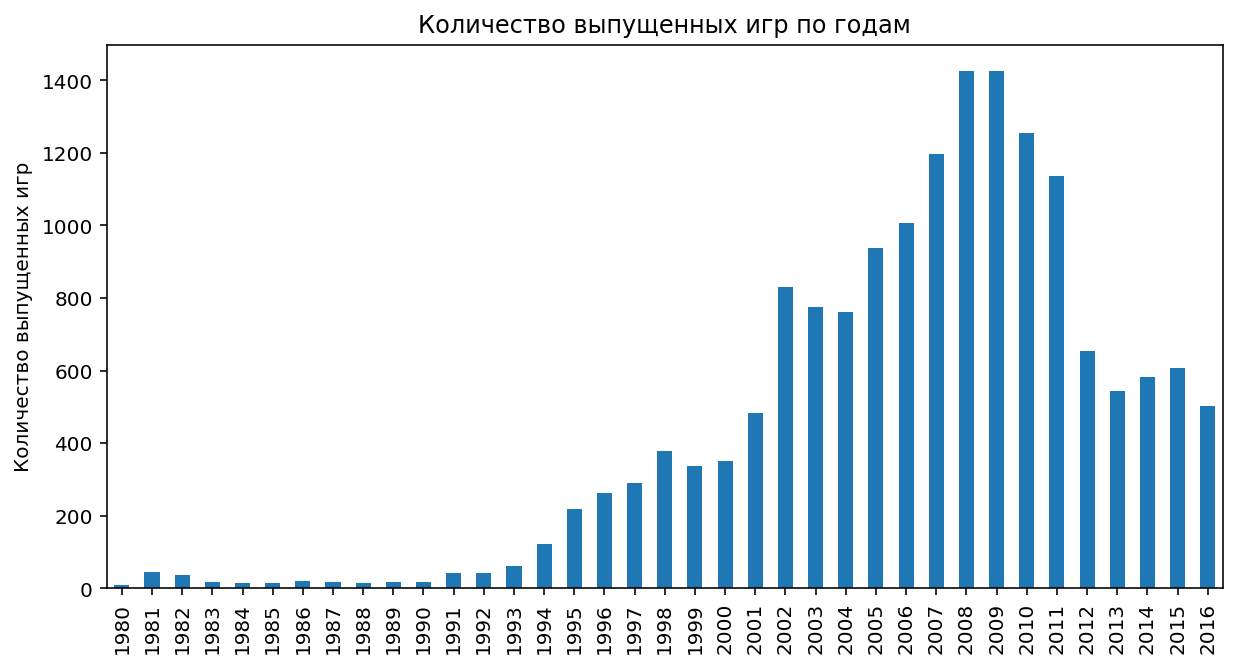

In [16]:
df.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(10, 5));
plt.title('Количество выпущенных игр по годам')
plt.ylabel('Количество выпущенных игр')
plt.xlabel(None);

Больше всего игр выпускалось в 2008 и 2009 годах. Меньше всего с 1980 по 1993. С 2012 по 2016 года наблюдаем стабильно средние показатели.

Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и посмотрим на распределение по годам.

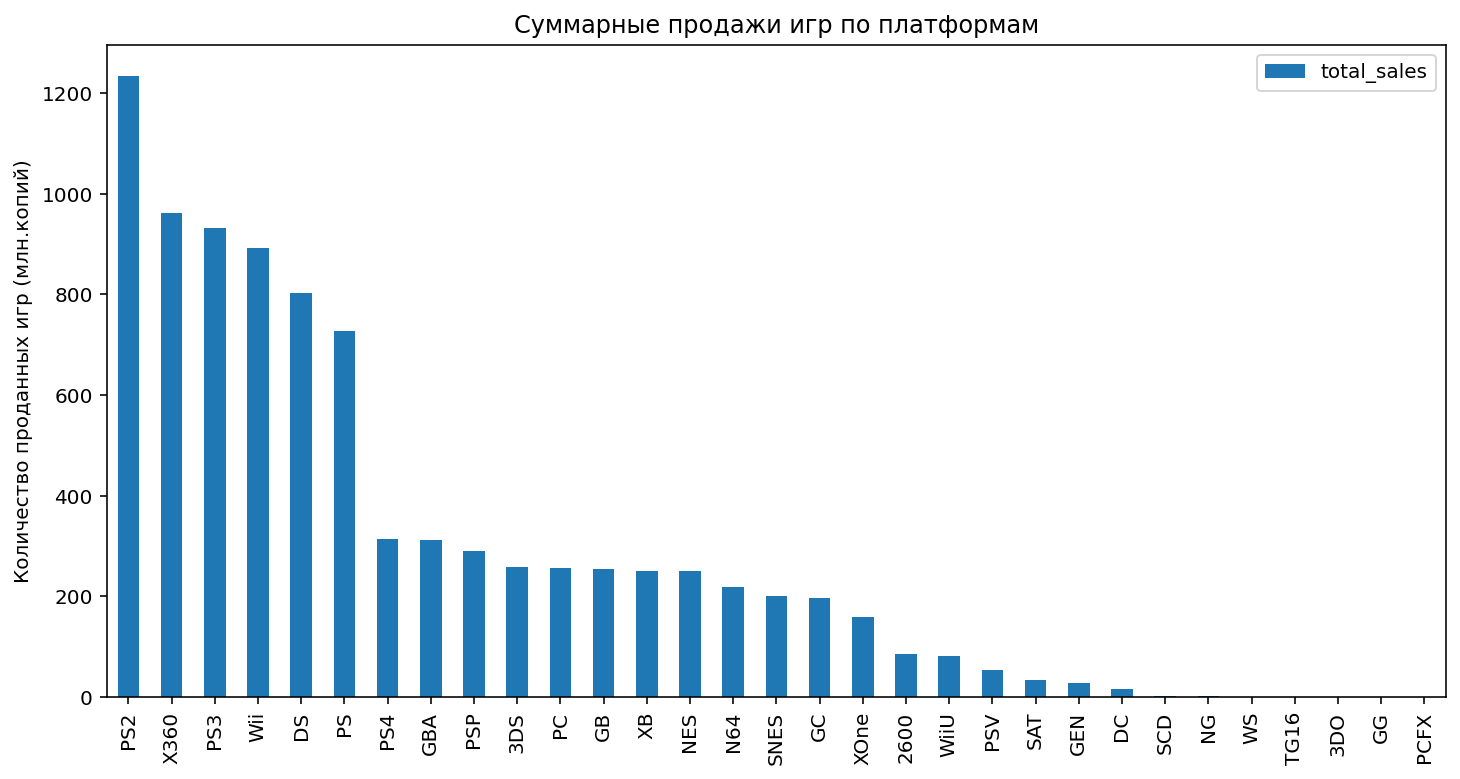

In [17]:
(df
 .groupby('platform')[['total_sales']]
 .sum()
 .sort_values(
     by='total_sales', 
     ascending=False)
 .plot(
     kind='bar', 
     figsize=(12, 6)
     )
 );
plt.title('Суммарные продажи игр по платформам')
plt.ylabel('Количество проданных игр (млн.копий)')
plt.xlabel(None);

По графику видно, что самые популярные платформы за все время это PS2, X360, PS3, WII, DS и PS. Выделим эти платформы в отдельную таблицу.

In [18]:
top_platforms = df.groupby('platform')['total_sales'].sum().nlargest(6)
top_platforms = top_platforms.reset_index()
top_platforms

,platform,total_sales
0,PS2,"1,233.56"
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


Рассмотрим динамику продаж для самых популярных платформ за все время.

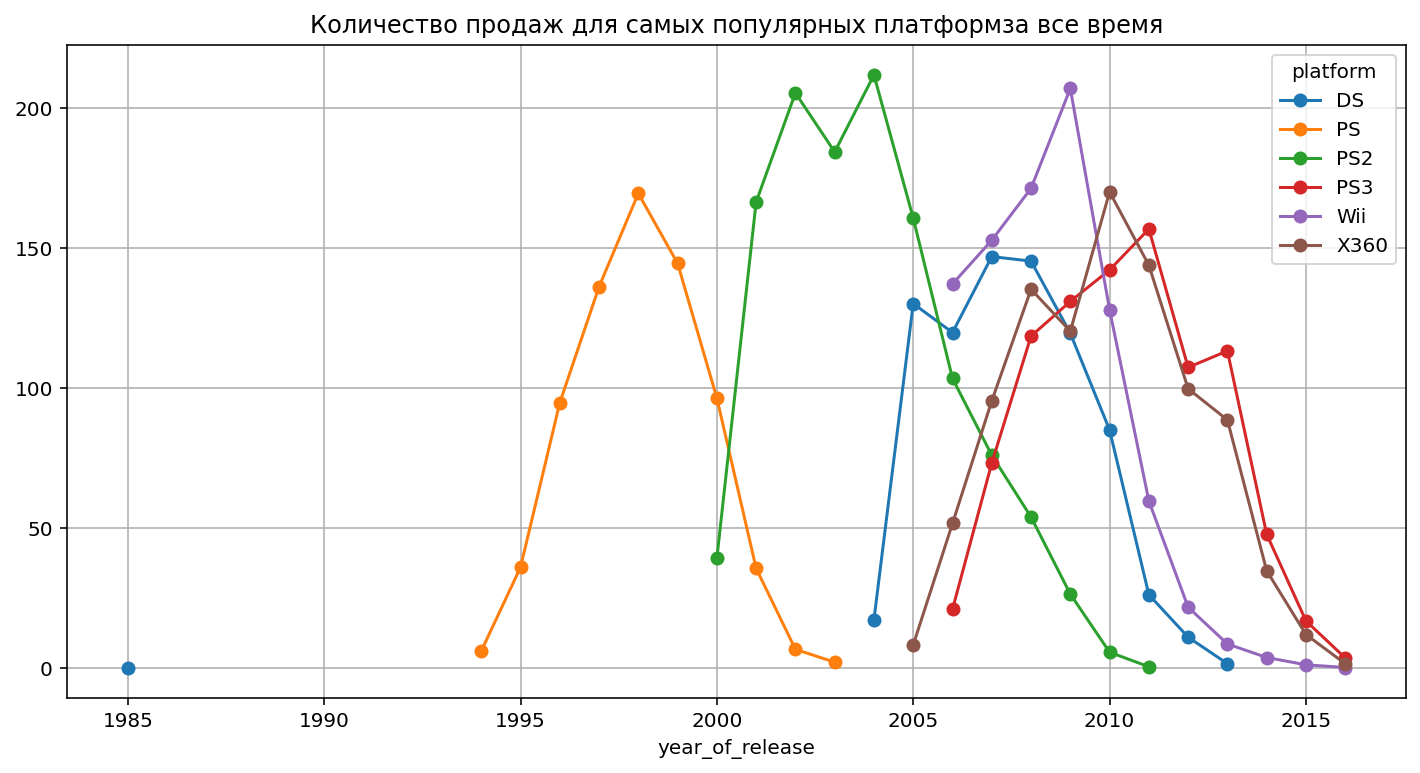

In [19]:
(df
 .query('platform in @top_platforms.platform')
 .pivot_table(
     index='year_of_release', 
     columns='platform', 
     values='total_sales', 
     aggfunc='sum'
     )
 .plot(
     style='o-', 
     grid=True, 
     figsize=(12, 6))
 );
plt.title('Количество продаж для самых популярных платформза все время');

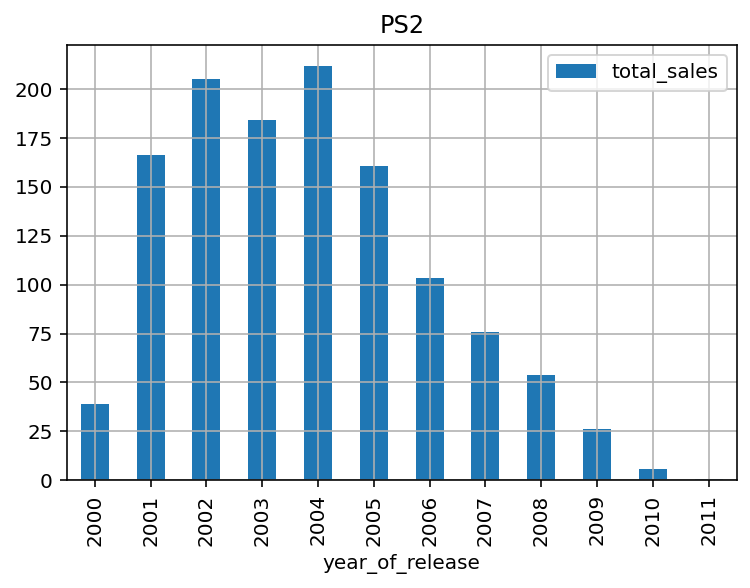

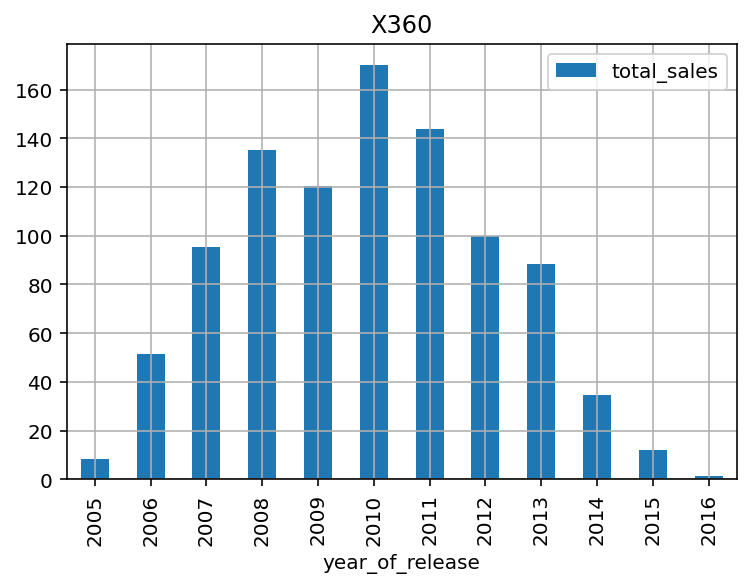

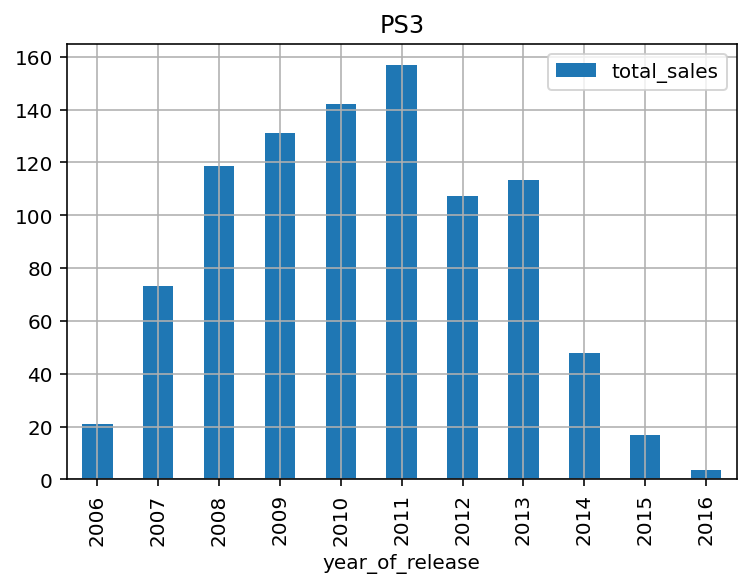

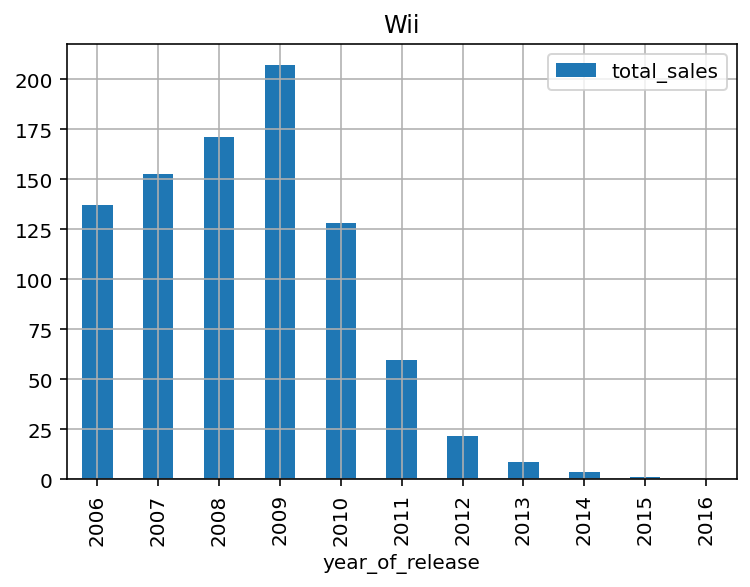

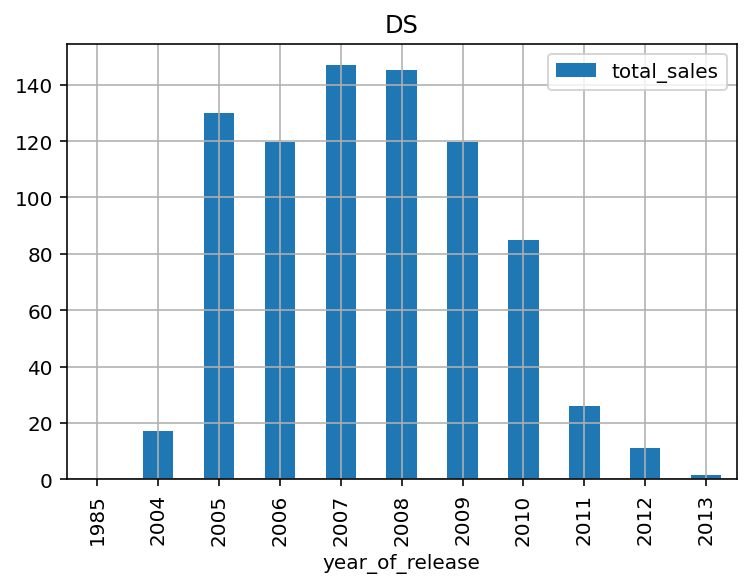

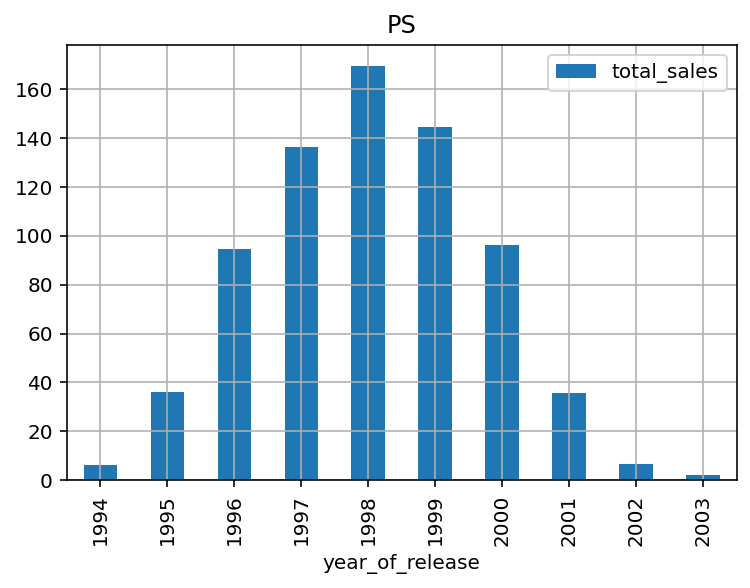

In [20]:
for x in top_platforms.platform:
    (df.loc[df['platform'] == x]
     .pivot_table(
         index='year_of_release', 
         values='total_sales', 
         aggfunc='sum')
     .plot(
         kind='bar', 
         grid=True));
    plt.title(x);

Судя по графикам, игровые платформы существуют в среднем около 10 лет. Пик популярности приходится на 4-6 года существования, однако не всегда. Платформы DS и PS2 несколько лет сохраняли стабильно высокие продажи.

Необходимо определить актуальный период, данные за который помогут спрогнозировать продажи на 2017 год.

Возьмем актуальный период равный 5 годам, с 2012 по 2016. Судя по графику выпущенных игр, это достаточно близкий и стабильный период.

In [21]:
df_act_period = df.query('year_of_release > 2011').reset_index(drop=True)
df_act_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2882,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Датафрейм сократился до 2886 строк.

Помотрим на какие платформы лучше продавались игры в актальный период (2012 - 2016).

In [22]:
df_act_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4    314.14
PS3    288.79
X360   236.54
3DS    194.61
XOne   159.32
WiiU    82.19
PC      62.65
PSV     49.18
Wii     35.37
DS      12.55
PSP     11.19
Name: total_sales, dtype: float64

Видно, что с 2012 по 2016 значительно лучше других продаются игры на PS4, PS3, X360, 3DS, XOne.

Рассмотрим общую динамику продаж на графике.

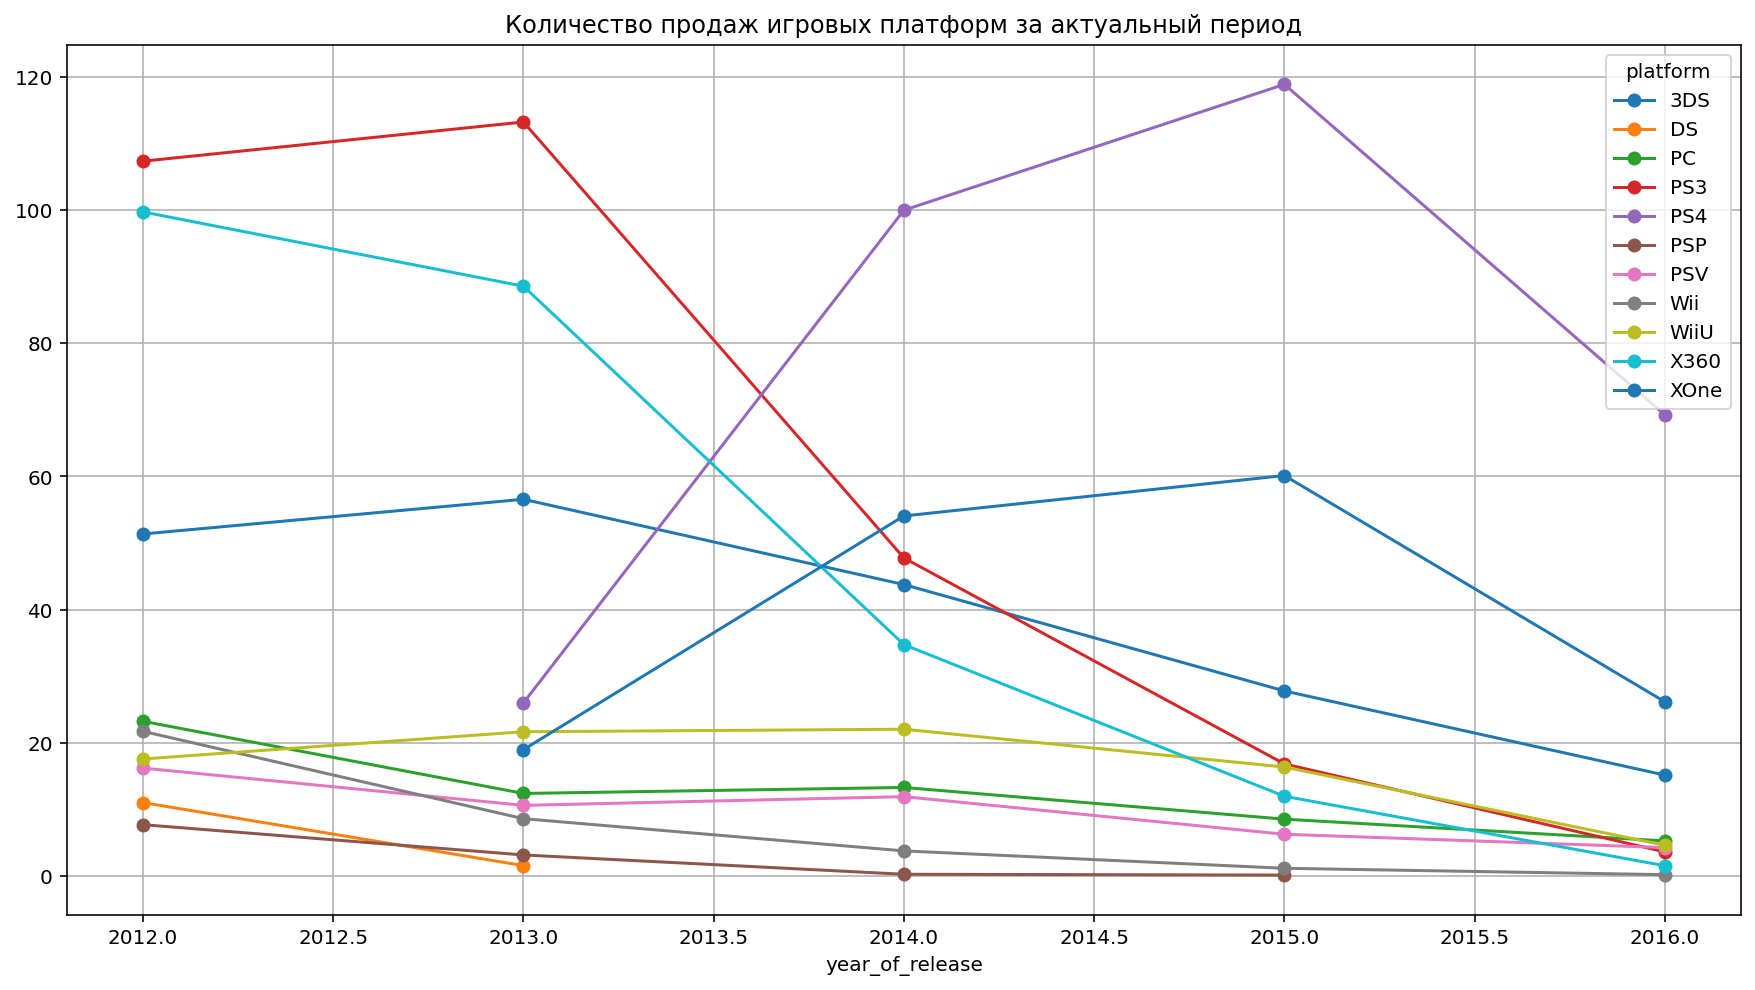

In [23]:
(df_act_period
  .pivot_table(
     index='year_of_release', 
     columns='platform', 
     values='total_sales', 
     aggfunc='sum'
     )
 .plot(
     style='o-', 
     grid=True, 
     figsize=(15, 8)
     )
 );
plt.title('Количество продаж игровых платформ за актуальный период'); 

Рассмотрим подробнее распределение продаж трех самых продаваемых платформ с графика:

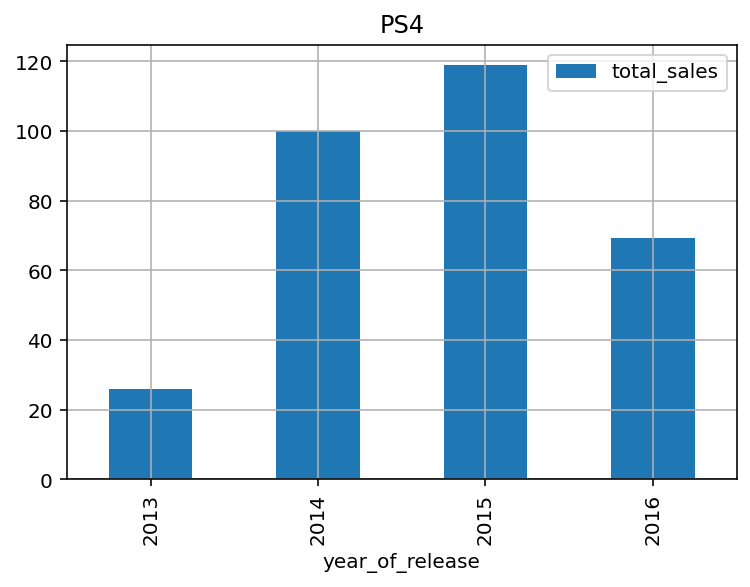

In [24]:
(df_act_period
 .query('platform == "PS4"')
 .pivot_table(
     index='year_of_release', 
     values='total_sales', 
     aggfunc='sum')
 .plot(
     kind='bar', 
     grid=True));
 
plt.title('PS4');

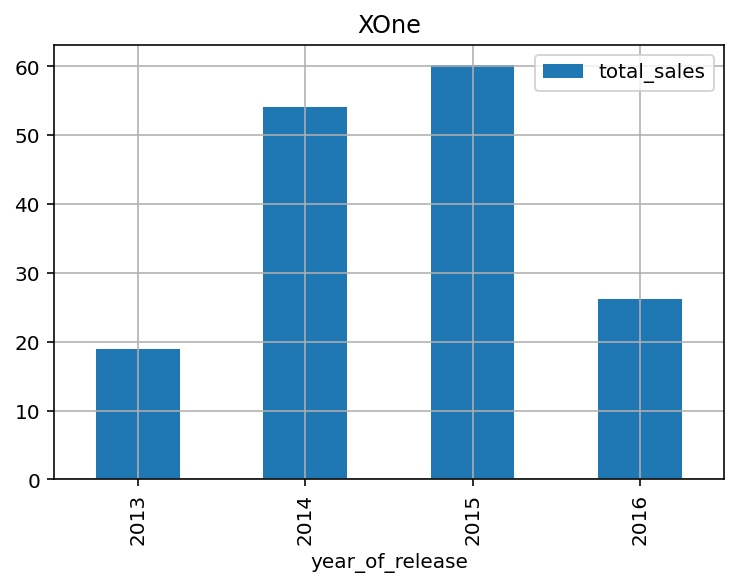

In [25]:
(df_act_period
 .query('platform == "XOne"')
 .pivot_table(
     index='year_of_release', 
     values='total_sales', 
     aggfunc='sum')
 .plot(
     kind='bar', 
     grid=True));

plt.title('XOne');

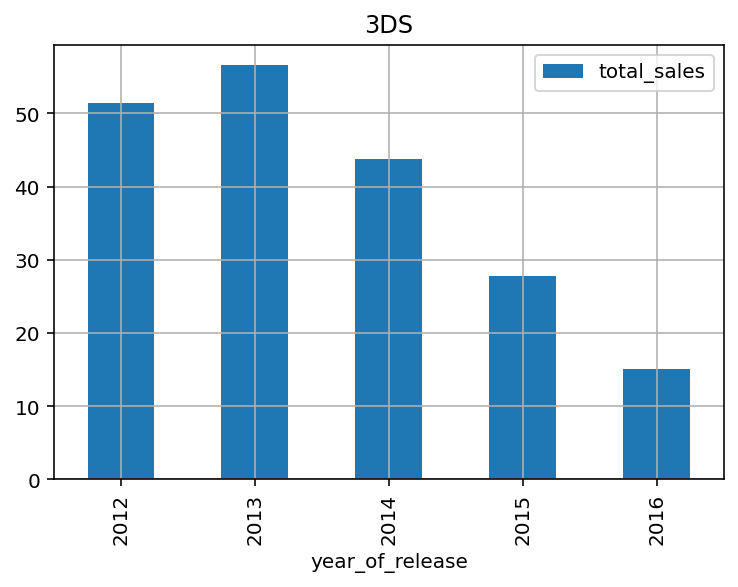

In [26]:
(df_act_period
 .query('platform == "3DS"')
 .pivot_table(
     index='year_of_release', 
     values='total_sales', 
     aggfunc='sum')
 .plot(
     kind='bar', 
     grid=True));

plt.title('3DS');

Судя по графикам, больше всего продается игр на PS4, 3DS и XOne. С 2013 по 2015 продажи игра на PS4 и XOne резко возросли. В 2016 году наблюдаем общий спад продаж,но это вероятно связано с неполными данными за последний год. Ожидаем, что тенденция к росту сохранится и отметим PS4 и XOne как две потенциально прибыльные платформы. 

Число продаж по большинству остальных платформ за последние 5 лет остается стабильно низким. 

Построим график «ящик с усами» по глобальным продажам игр в разбивке по
платформам.

Выделим 5 основных игровых платформ.

In [27]:
df_act_period.groupby('platform')['total_sales'].sum().nlargest(5)

platform
PS4    314.14
PS3    288.79
X360   236.54
3DS    194.61
XOne   159.32
Name: total_sales, dtype: float64

In [28]:
top5_platforms = df_act_period.query(
    'platform in ("PS4", "PS3", "X360", "3DS", "XOne")')[
      ['platform', 'total_sales', 'critic_score', 'user_score']]
top5_platforms

,platform,total_sales,critic_score,user_score
0,PS3,21.05,97.00,8.20
1,X360,16.27,97.00,8.10
2,PS4,14.63,NaN,NaN
3,3DS,14.60,NaN,NaN
4,PS3,13.79,83.00,5.30
...,...,...,...,...
2871,XOne,0.01,NaN,NaN
2872,PS3,0.01,NaN,NaN
2873,3DS,0.01,NaN,NaN
2878,PS3,0.01,NaN,NaN


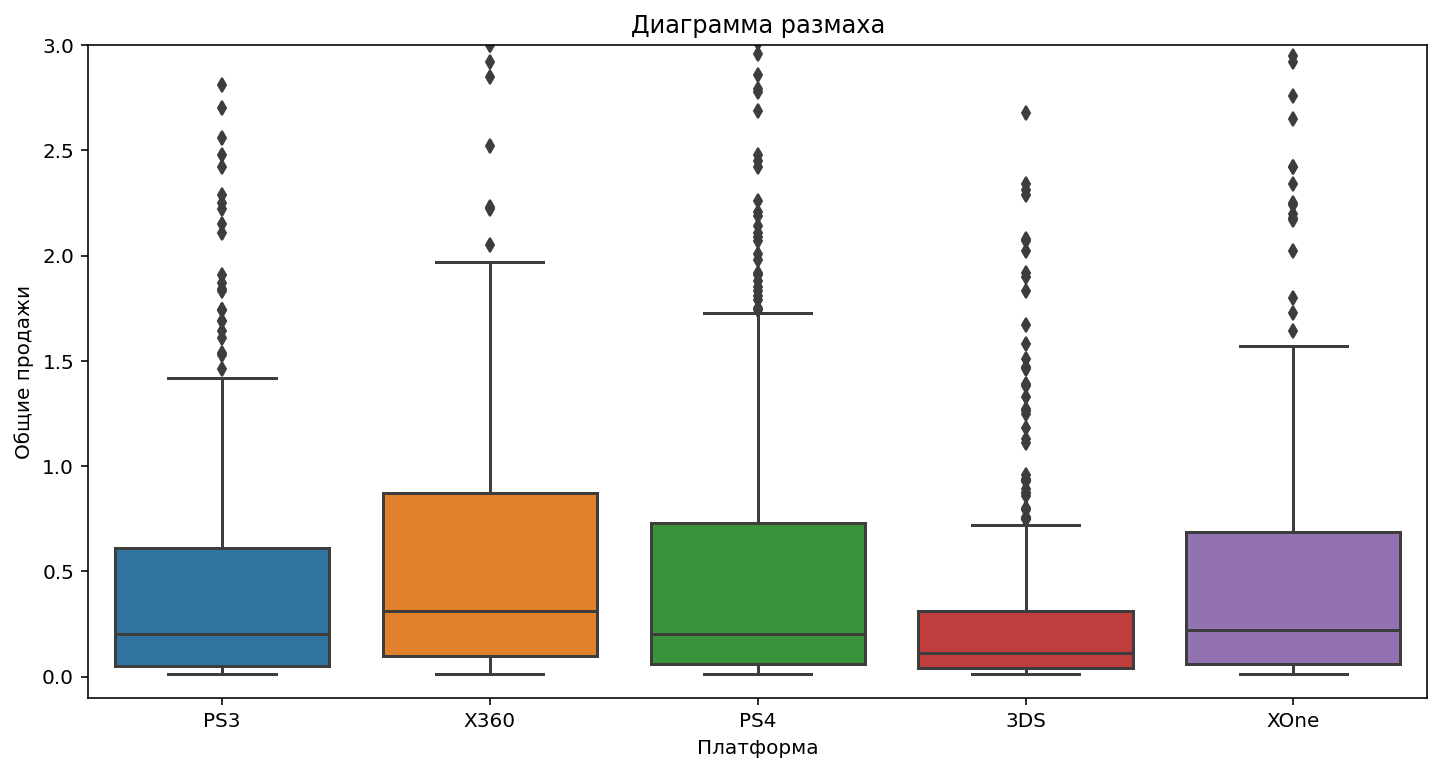

In [29]:
plt.figure(figsize=(12,6))
plt.ylim(-0.1, 3)
sns.boxplot(data=top5_platforms, x='platform', y='total_sales')
plt.title('Диаграмма размаха')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи');

**Вывод**

Все "графики с усами" имеют нижнюю границу на 0. Верхние границы отличаются, значит дисперсия значений для разных платформ отличается. Больше всех дисперсия у X360, меньше всех у 3DS. 
Все медианные значения находятся в пределах до 0.4, но на разном уровне. 
Наблюдаем много единичных выбросов за пределы верхних усов графиков, т.е. слишком большие значения.


Посмотрим как влияют на продажи внутри платформы **Xbox 360**
отзывы пользователей и критиков. Построим диаграмму рассеяния и
посчитаем корреляцию между отзывами и продажами. 

In [30]:
df_x360 = df_act_period[df_act_period['platform'] == 'X360']
df_x360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
5,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.00,4.80,M,13.68
8,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.00,2.60,M,10.24
10,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.00,7.00,M,9.71
12,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,9.18


Найдем коэффициент корреляции между общими продажами **Xbox 360** и оценками пользователей.

In [31]:
df_x360['total_sales'].corr(df_x360['user_score'])

0.0061639786462133256

Построим диаграмму рассеяния 

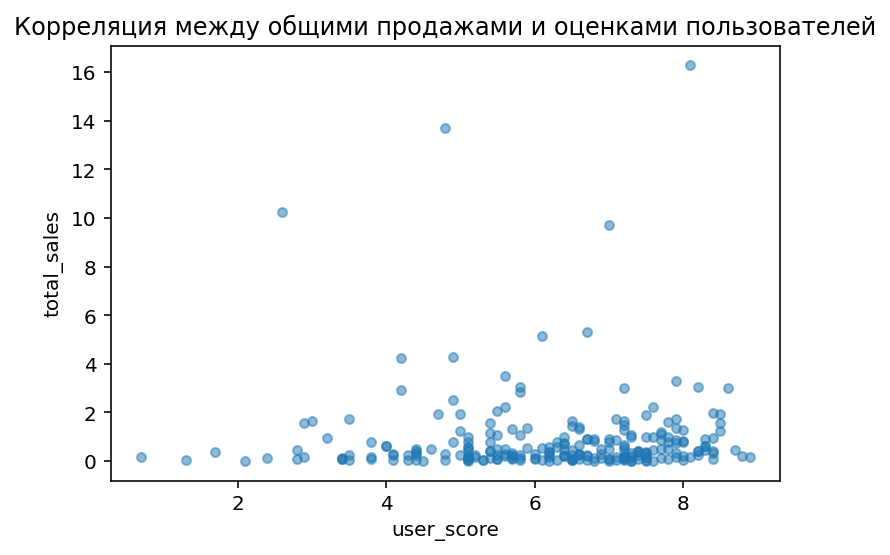

In [32]:
df_x360.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5) 
plt.title('Корреляция между общими продажами и оценками пользователей');

Рассмотрим аналогично параметры оценки критиков и продаж **Xbox 360**.

In [33]:
df_x360['total_sales'].corr(df_x360['critic_score'])

0.36057348885073365

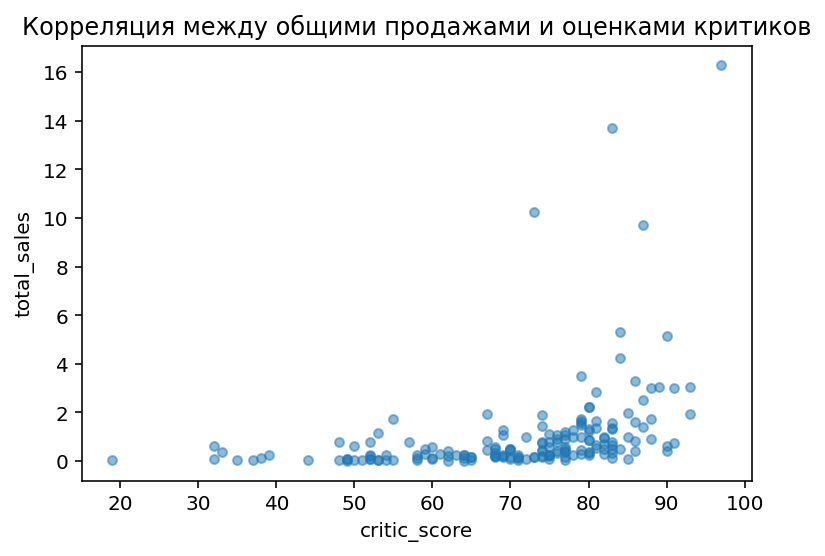

In [34]:
df_x360.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5) 
plt.title('Корреляция между общими продажами и оценками критиков');

**Вывод**

Имеем очень слабую корреляцию между параметрами оценки пользователей и продаж на платформе Xbox 360. Но видим, что высокие оценки преобладают и среди высоко оцененных игр больше хорошо продающихся. 

Корреляция между оценками критиков и продажами Xbox 360 чуть более сильная, но заметна лишь на уровне оценок от 70 и выше. Хорошо продаваемые игры сопровождают хорошие оценки.

**Посмотрим на корреляцию у других платформ из топ-5.**

In [35]:
top5_platforms.groupby('platform').corr()[['total_sales']]

total_sales
platform                          
3DS      total_sales          1.00
         critic_score         0.32
         user_score           0.20
PS3      total_sales          1.00
         critic_score         0.33
         user_score          -0.01
PS4      total_sales          1.00
         critic_score         0.41
         user_score          -0.03
X360     total_sales          1.00
         critic_score         0.36
         user_score           0.01
XOne     total_sales          1.00
         critic_score         0.42
         user_score          -0.07

Корреляция между отзывами пользователей и платформой PS4 : -0.031957110204556424
Корреляция между отзывами критиков и платформой PS4 : 0.406567902061781


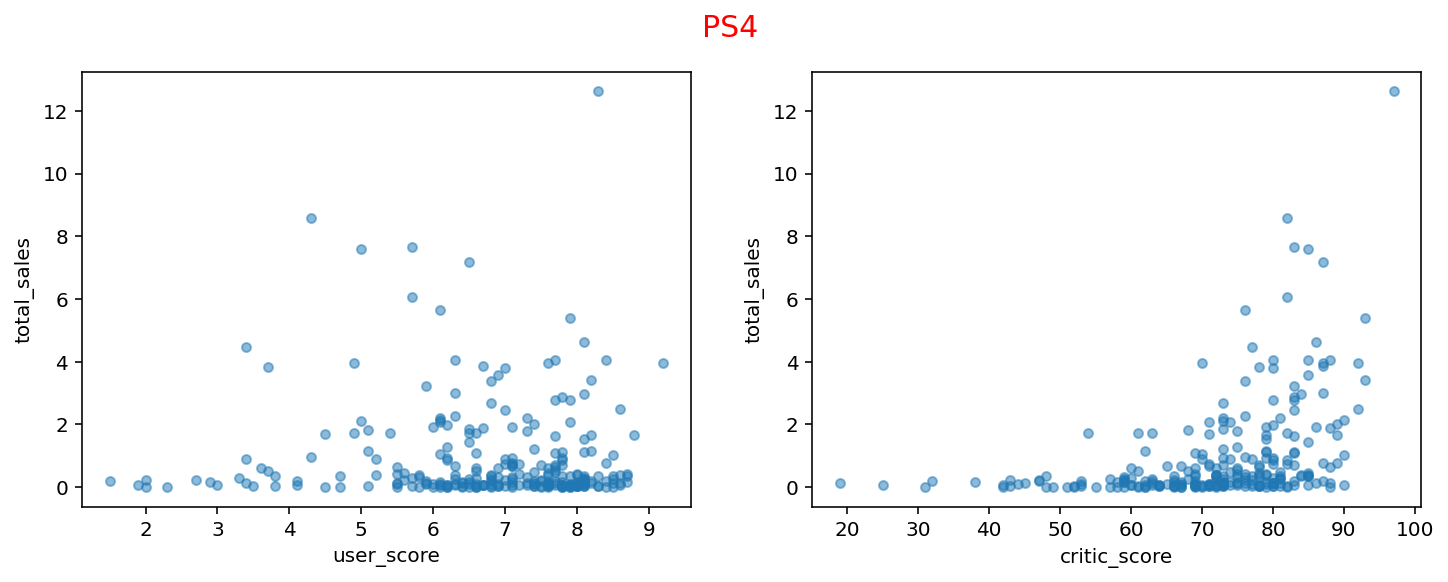


Корреляция между отзывами пользователей и платформой PS3 : -0.005143522887113816
Корреляция между отзывами критиков и платформой PS3 : 0.3314972592629587


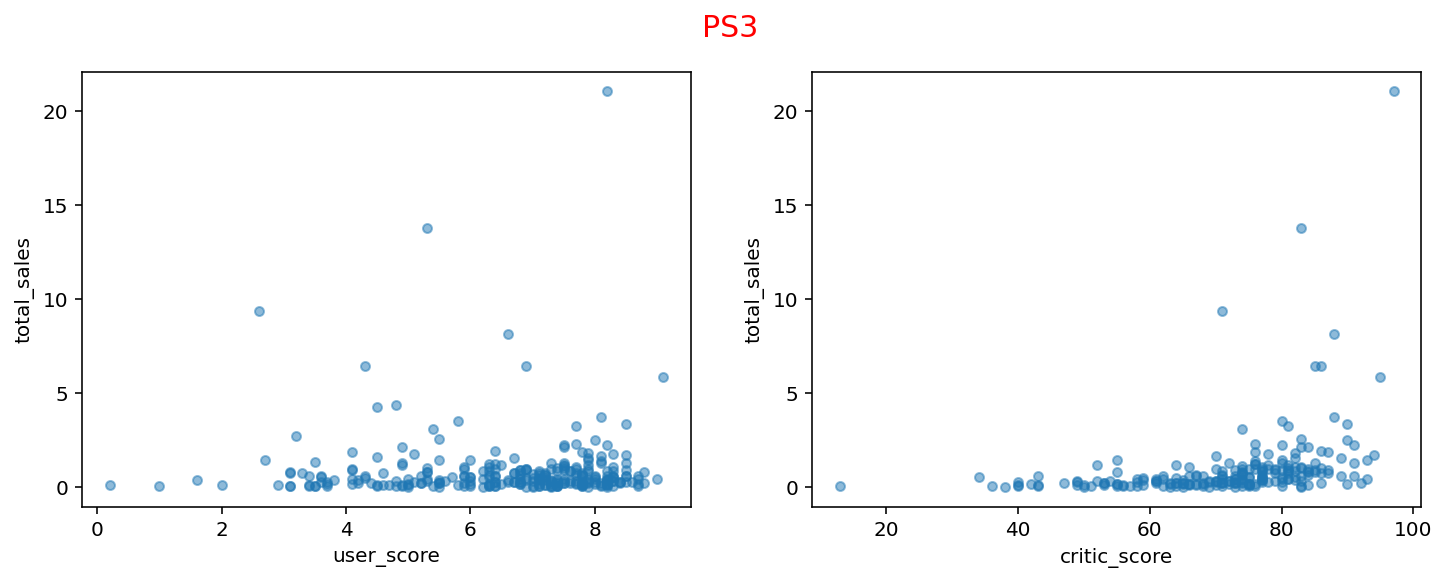


Корреляция между отзывами пользователей и платформой 3DS : 0.19758263411038596
Корреляция между отзывами критиков и платформой 3DS : 0.32080286953607845


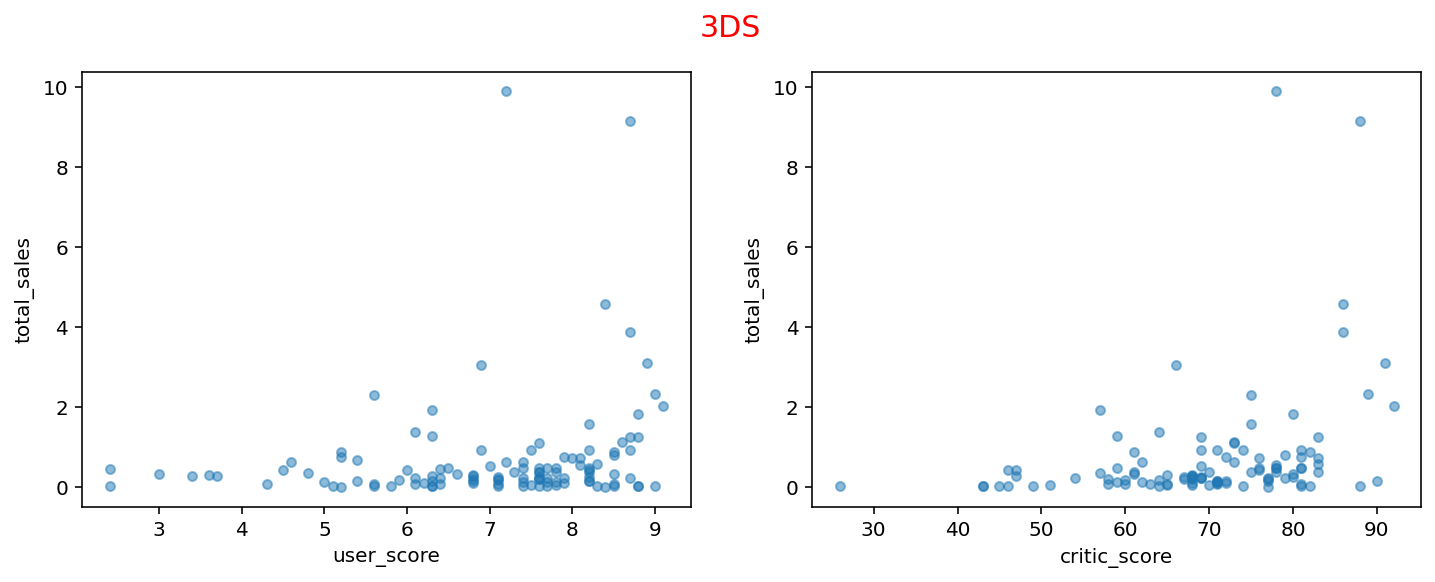


Корреляция между отзывами пользователей и платформой XOne : -0.06892505328279412
Корреляция между отзывами критиков и платформой XOne : 0.41699832800840175


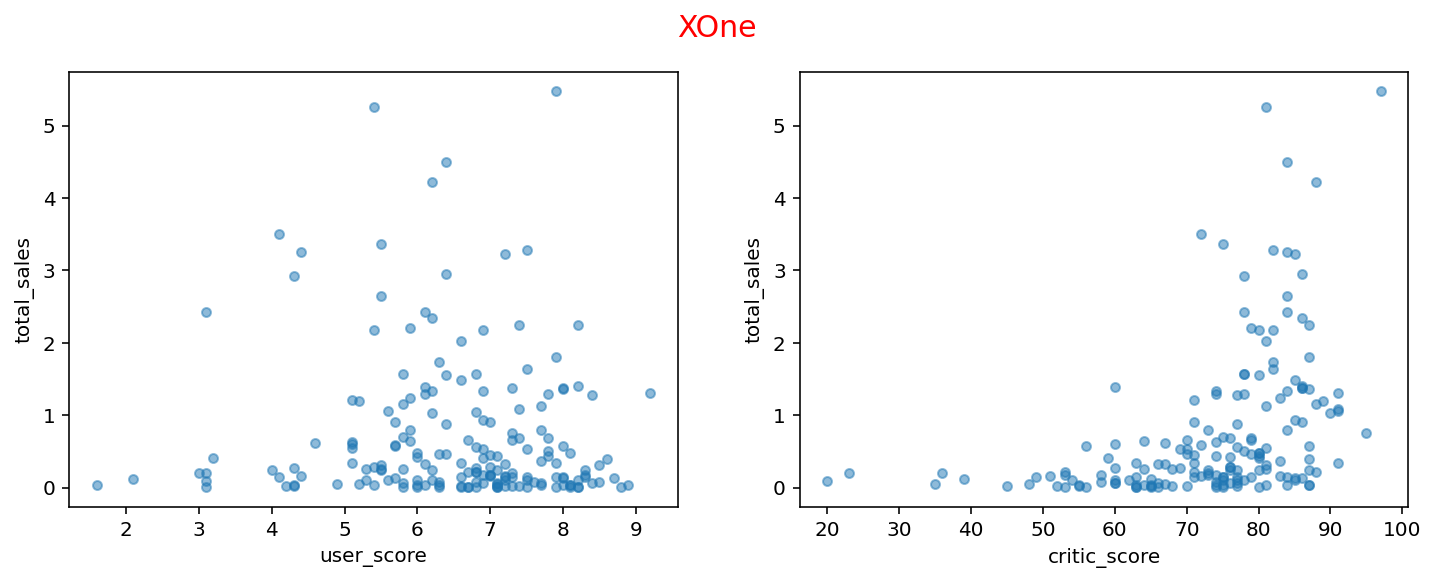

In [36]:
def get_cor(x):
  data = df_act_period[df_act_period['platform'] == x]
  user_cor = data['total_sales'].corr(data['user_score'])
  critic_cor = data['total_sales'].corr(data['critic_score'])
  print(f'Корреляция между отзывами пользователей и платформой {x} : {user_cor}') 
  print(f'Корреляция между отзывами критиков и платформой {x} : {critic_cor}')
    
  fig, ax = plt.subplots(1,2, figsize=(12,4))
  fig.suptitle(x, fontsize=15, color='red')
  data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, ax=ax[0])
  data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, ax=ax[1])
  plt.show()
  print()

plist = ["PS4", "PS3", "3DS", "XOne"]

for platform in plist:
  get_cor(platform)  

Видим, что зависимость продаж от оценки критиков у всех платформ выше, чем от оценки пользователей. Хотя коэффициенты корреляции все же не высокие, от 0,32 до 0,42, а это означает слабую корреляцию.

Построим общую матрицу корреляции.

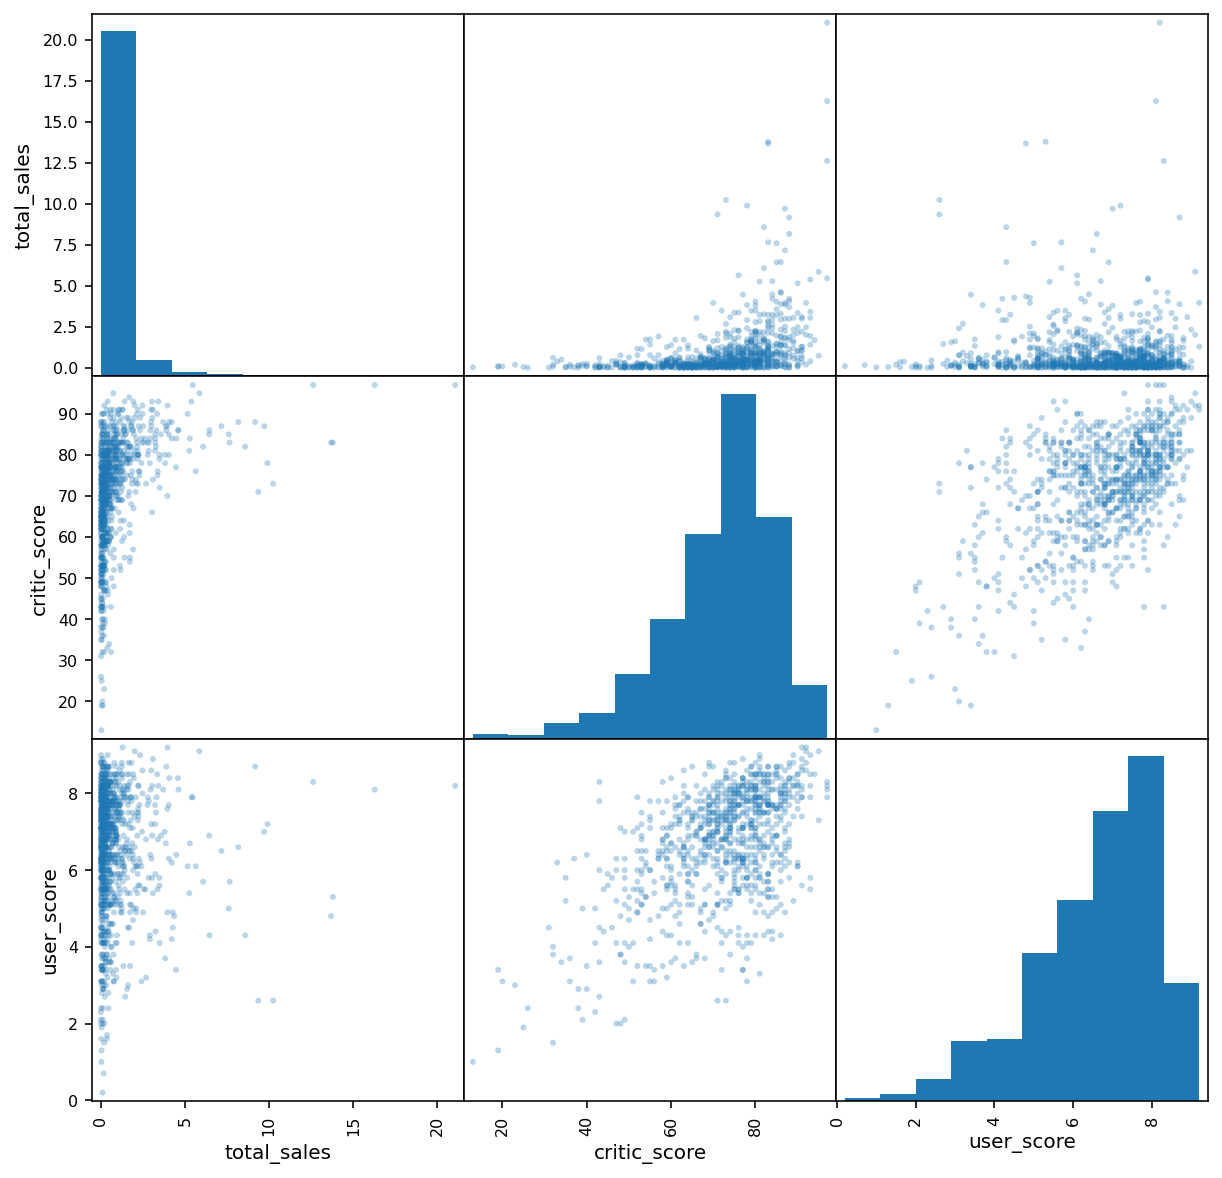

In [37]:
pd.plotting.scatter_matrix(top5_platforms, figsize=(10, 10), alpha=0.3);

**Вывод**

Можно сказать, что у популярных платформ практически отсутствует корреляция между оценками пользователей и продажами. Оценки критиков больше коррелируют с продажами, но это заметно в диапазоне от 70 баллов и выше. Чем лучше отзывы критиков, тем больше видим продаж.
Можно сделать вывод, что покупатели больше доверяют критикам, чем пользователям.

**Посмотрим на общее распределение игр по жанрам.** 


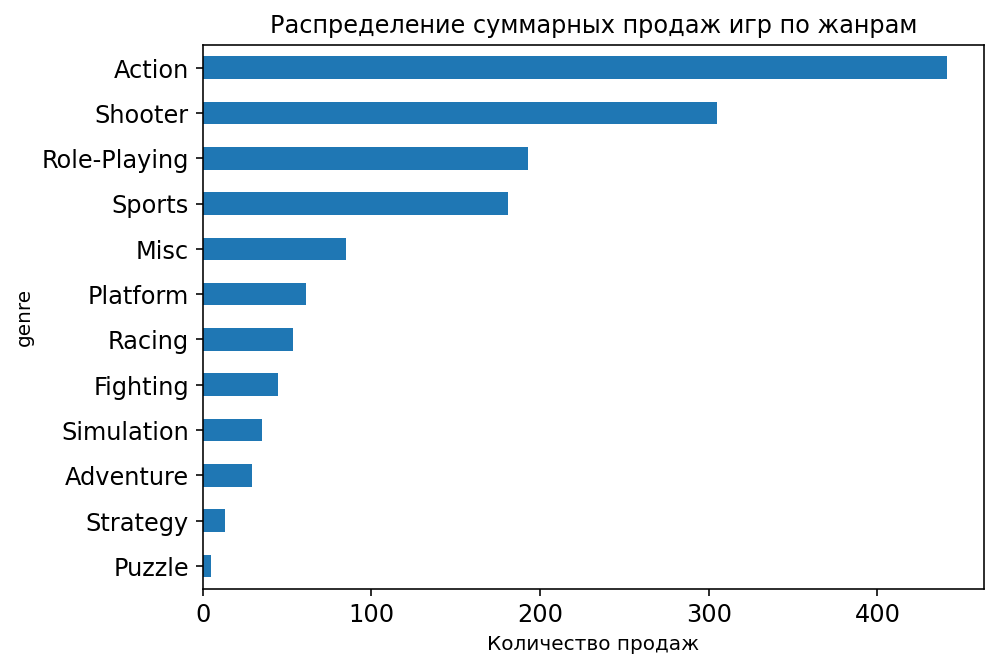

In [38]:
df_act_period.groupby('genre')['total_sales'].sum().sort_values().plot(kind='barh', figsize=(7, 5), fontsize=12)
plt.title('Распределение суммарных продаж игр по жанрам')
plt.xlabel('Количество продаж');

Рассмотрим количество игр в каждом жанре

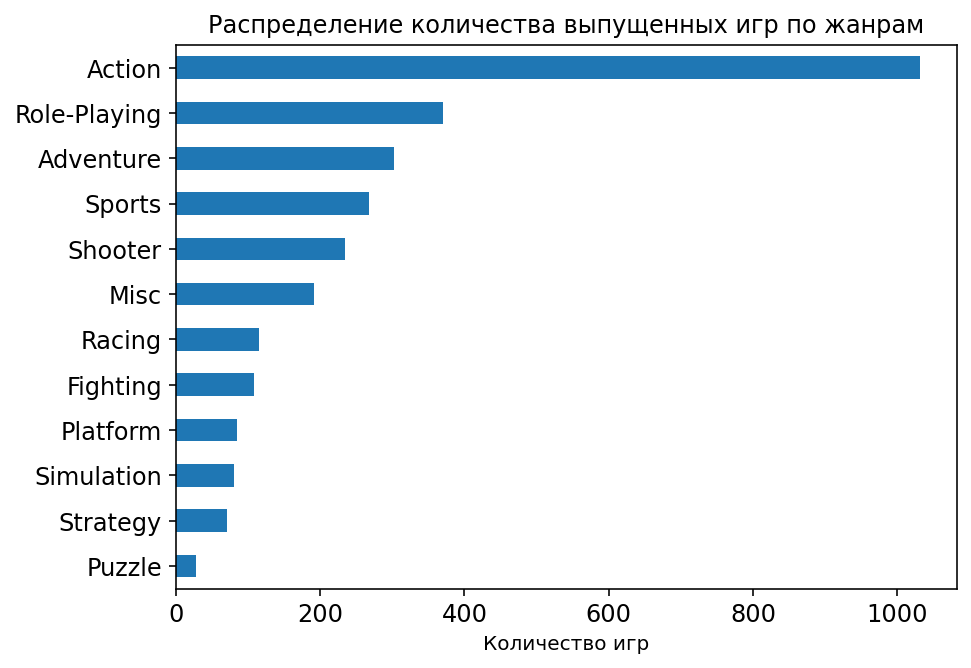

In [39]:
df_act_period['genre'].value_counts().sort_values().plot(kind='barh', figsize=(7, 5), fontsize=12)
plt.title('Распределение количества выпущенных игр по жанрам')
plt.xlabel('Количество игр');

Лидирют также Экшен-игры. Среди других жанров распределение отличается. Например, шутеры на пятом месте по количеству игр, однако по продажам они на втором месте. Игры в жанре Приключения, наоборот, выпускаются в большом количестве, но по объему продаж они на третьем месте с конца.

Посмотрим медианные значения продаж для каждого жанра за актуальный период.

In [40]:
df_act_period.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter        0.44
Sports         0.24
Platform       0.21
Role-Playing   0.14
Racing         0.14
Fighting       0.13
Action         0.12
Misc           0.12
Simulation     0.12
Strategy       0.08
Puzzle         0.04
Adventure      0.03
Name: total_sales, dtype: float64

**Вывод**

Можно сказать, что самые продаваемые игры в жанре Action (Экшен), далее следуют шутеры, ролевые и спортивные игры. Пазлы и стратегии пользуются наименьшим спросом.

Видим, что в жанре Шутер медианное значение продаж вдвое выше ближайших конкурентов. Можно сказать, что в этом жанре выше доля очень успешных игр, но выпускаются они не так часто как Экшен-игры. Объем продаж Экшен-игр связан больше с объемом выпуска, ведь медианное значение продаж у них ниже среднего по отношению к другим жанрам.


## Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясним разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?


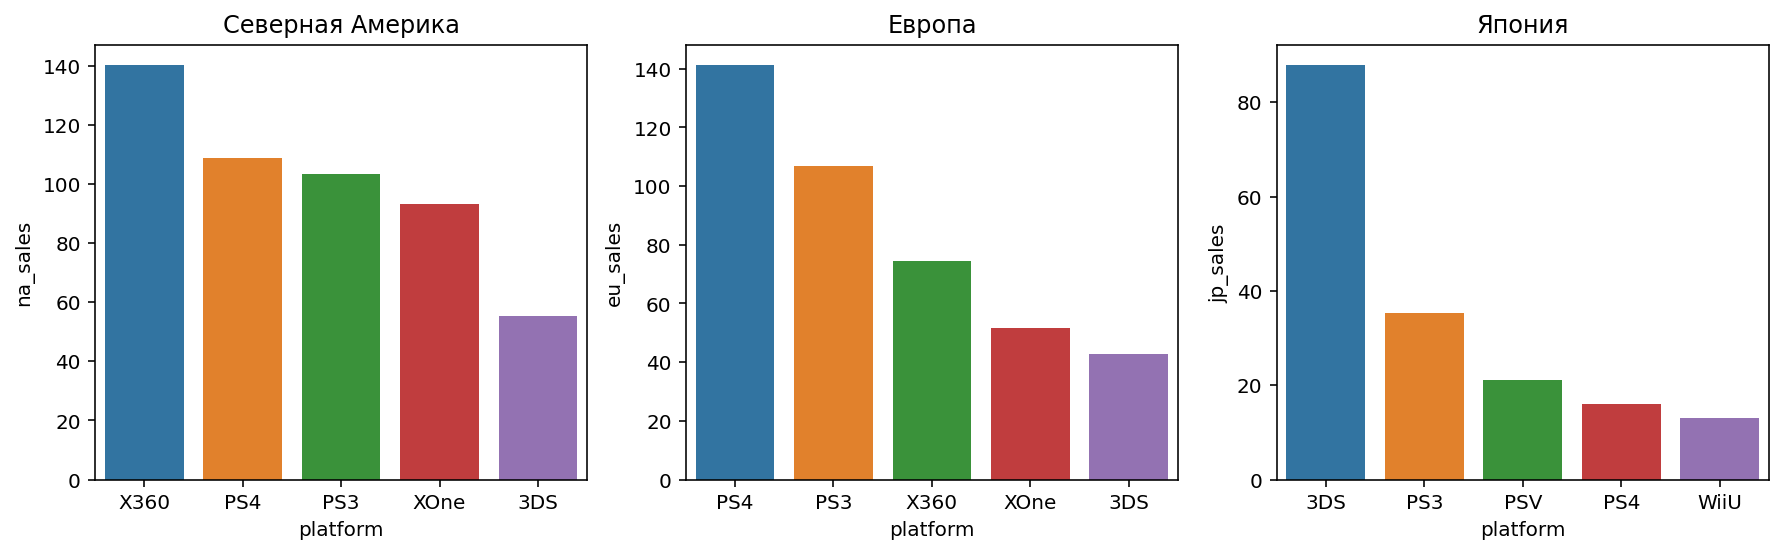

In [41]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
na = df_act_period.groupby('platform')['na_sales'].sum().nlargest(5).reset_index()
sns.barplot(data=na, x='platform', y='na_sales')
plt.title('Северная Америка');
plt.subplot(1, 3, 2)
eu = df_act_period.groupby('platform')['eu_sales'].sum().nlargest(5).reset_index()
sns.barplot(data=eu, x='platform', y='eu_sales')
plt.title('Европа');
plt.subplot(1, 3, 3)
jp = df_act_period.groupby('platform')['jp_sales'].sum().nlargest(5).reset_index()
sns.barplot(data=jp, x='platform', y='jp_sales')
plt.title('Япония');

Во всех регионах разные предпочтения. В Америке больше любят Xbox 360, в Европе - Play Station, в Японии с большим отрывом лидирует платформа Nintendo 3DS. В остальных регионах игры на 3DS пользуются наименьшим спросом. В Северной Америке, судя по графику, в целом приобретается больше игр, чем в других регионах.

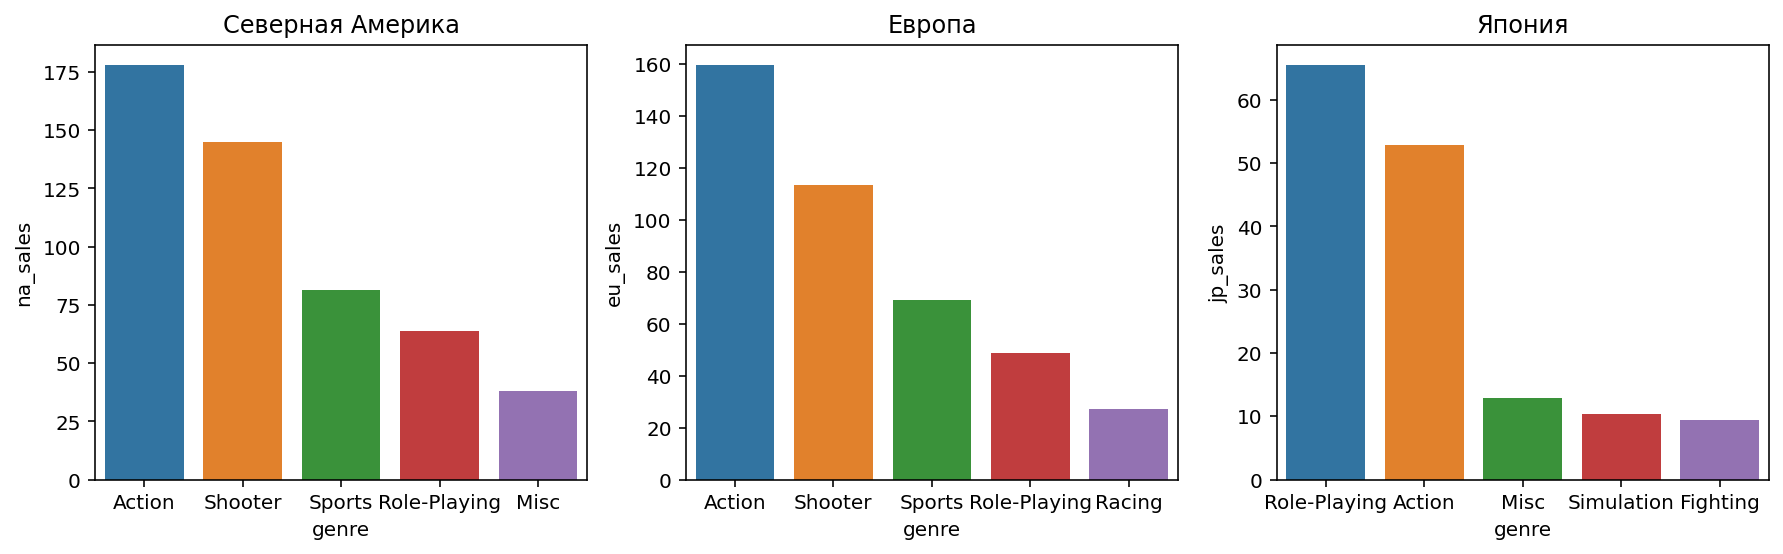

In [42]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
na = df_act_period.groupby('genre')['na_sales'].sum().nlargest(5).reset_index()
sns.barplot(data=na, x='genre', y='na_sales')
plt.title('Северная Америка');
plt.subplot(1, 3, 2)
eu = df_act_period.groupby('genre')['eu_sales'].sum().nlargest(5).reset_index()
sns.barplot(data=eu, x='genre', y='eu_sales')
plt.title('Европа');
plt.subplot(1, 3, 3)
jp = df_act_period.groupby('genre')['jp_sales'].sum().nlargest(5).reset_index()
sns.barplot(data=jp, x='genre', y='jp_sales')
plt.title('Япония');


Жанровые предпочтения в Америке и Европе практически совпадают. Пользователям одинаково нравятся экшены и шутеры. Тогда как в Японии лучше продаются игры жанра ролевой игры. Экшен на втором месте. Остальные жанры пользуются в Японии довольно низкой популярностью.

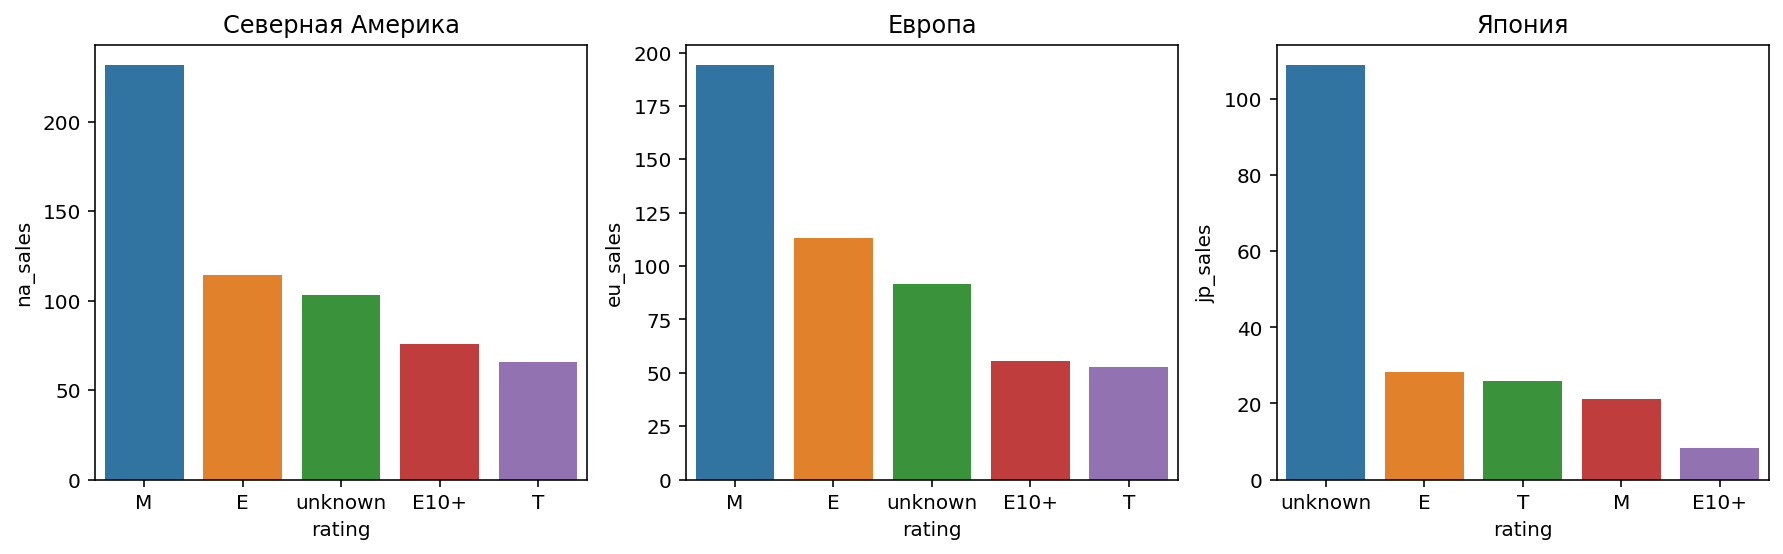

In [43]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
na = df_act_period.groupby('rating')['na_sales'].sum().nlargest(5).reset_index()
sns.barplot(data=na, x='rating', y='na_sales')
plt.title('Северная Америка');
plt.subplot(1, 3, 2)
eu = df_act_period.groupby('rating')['eu_sales'].sum().nlargest(5).reset_index()
sns.barplot(data=eu, x='rating', y='eu_sales')
plt.title('Европа');
plt.subplot(1, 3, 3)
jp = df_act_period.groupby('rating')['jp_sales'].sum().nlargest(5).reset_index()
sns.barplot(data=jp, x='rating', y='jp_sales')
plt.title('Япония');


В Европе и Америке распределение рейтингов одинаковое, популярнее всего игры категории «M» («Mature») — «От 17 лет», далее с большим отрывом игры «E» («Everyone») — «Для всех», 10+ и «T» («Teen») — «Подросткам». 

В Японии другая ситуация. Видим преимущественно игры без пометки о рейтинге. Поскольку игры, рассматриваемые за актуальный период, должны обязательно иметь пометку о рейтинге, можно предположить, что дело в некачественных исходных данных, либо возникла проблема с распознаванием рейтингов определнных стран. Среди остальных лидеров - игры категорий «Для всех» и «Подросткам», далее идут игры с рейтингом «От 17 лет» и меньше всего предпочитают игры 10+. Вероятно, такой узкий рейтинг как 10+ получает в целом не так много игр.


**Вывод**

Предпочтения жителей Японии сильно отличаются от Европы и Америки. В Японии больше популярны ролевые игры для детей и подростков и японская игровая платформа 3DS. 

В Америке и Европе примерно одинаковые жанровые и рейтинговые предпочтения. Там больше популярны активные экшен игры и шутеры с рейтингом 17+. Но платформы пользователи выбирают разные. В Европе больше предпочитают Play Station, в Америке - Xbox 360. 

## Проверка гипотез

  **- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем нулевую гипотезу как: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Тогда альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC отличаются"

Примем пороговое значение в 5%. Если p-value окажется меньше него - отвергнем нулевую гипотезу.


Сформируем и рассмотрим выборки для выбора параметров проверки.

In [44]:
xbox_one = df_act_period[df_act_period['platform'] == 'XOne']['user_score']
xbox_one.unique(), xbox_one.shape

(array([nan, 7.9, 5.4, 6.4, 6.2, 4.1, 5.5, 7.5, 4.4, 7.2, 4.3, 3.1, 6.1,
        8.2, 7.4, 5.9, 6.9, 6.6, 6.3, 6.8, 5.8, 7.3, 8. , 9.2, 7.8, 8.4,
        5.1, 5.2, 7.7, 5.6, 5.7, 7. , 6.7, 4.6, 8.1, 6. , 7.1, 3.2, 8.6,
        8.5, 5.3, 4. , 8.3, 3. , 8.7, 2.1, 7.6, 4.9, 8.9, 1.6, 4.2, 8.8]),
 (247,))

In [45]:
pc = df_act_period[df_act_period['platform'] == 'PC']['user_score']
pc.unique(), pc.shape

(array([4. , 3.9, 7.9, 4.8, 4.2, 2.2, 6. , 5.4, nan, 6.7, 5.5, 8.2, 7.5,
        6.2, 5.7, 5.9, 9.3, 8.5, 8. , 7.7, 6.5, 3. , 6.8, 8.3, 4.7, 7.6,
        5.8, 4.5, 4.6, 6.6, 6.9, 2.1, 3.3, 7.3, 7. , 7.1, 5.6, 4.4, 3.2,
        8.6, 4.3, 7.4, 3.5, 4.9, 8.1, 6.4, 7.8, 8.4, 5.3, 8.9, 3.8, 8.7,
        2.5, 2.9, 3.6, 5.1, 3.4, 6.1, 6.3, 1.4, 3.7, 2.4]), (250,))

Отбросим пустые значения.

In [46]:
xbox_one = xbox_one.dropna()
xbox_one.unique(), xbox_one.shape

(array([7.9, 5.4, 6.4, 6.2, 4.1, 5.5, 7.5, 4.4, 7.2, 4.3, 3.1, 6.1, 8.2,
        7.4, 5.9, 6.9, 6.6, 6.3, 6.8, 5.8, 7.3, 8. , 9.2, 7.8, 8.4, 5.1,
        5.2, 7.7, 5.6, 5.7, 7. , 6.7, 4.6, 8.1, 6. , 7.1, 3.2, 8.6, 8.5,
        5.3, 4. , 8.3, 3. , 8.7, 2.1, 7.6, 4.9, 8.9, 1.6, 4.2, 8.8]), (182,))

In [47]:
pc = pc.dropna()
pc.unique(), pc.shape

(array([4. , 3.9, 7.9, 4.8, 4.2, 2.2, 6. , 5.4, 6.7, 5.5, 8.2, 7.5, 6.2,
        5.7, 5.9, 9.3, 8.5, 8. , 7.7, 6.5, 3. , 6.8, 8.3, 4.7, 7.6, 5.8,
        4.5, 4.6, 6.6, 6.9, 2.1, 3.3, 7.3, 7. , 7.1, 5.6, 4.4, 3.2, 8.6,
        4.3, 7.4, 3.5, 4.9, 8.1, 6.4, 7.8, 8.4, 5.3, 8.9, 3.8, 8.7, 2.5,
        2.9, 3.6, 5.1, 3.4, 6.1, 6.3, 1.4, 3.7, 2.4]), (206,))

В выборках 182 и 206 значений. Достаточно для проверки гипотезы. Посмотрим на характер распределения.

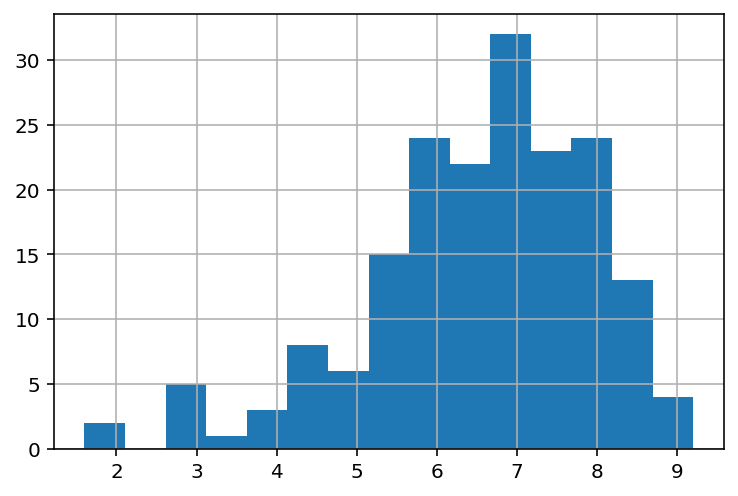

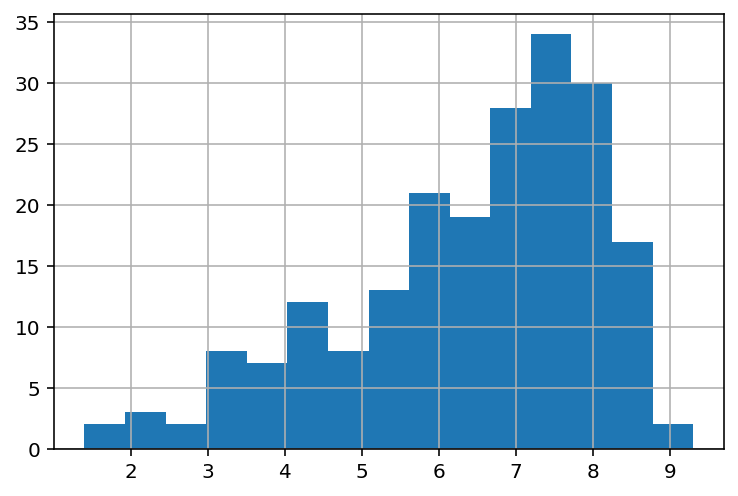

In [57]:
xbox_one.hist(bins=15)
plt.show()
pc.hist(bins=15)
plt.show()

Найдем дисперсию выборок.

In [48]:
np.var(xbox_one, ddof=1)

1.9069968429360695

In [49]:
np.var(pc, ddof=1)

2.770443997158418

Распределения похожи, близки к нормальному, но смещены вправо. Есть хвост низких значений. Дисперсия выборок не одинакова. Используем тест Стьюдента и параметр `equal_var = False`, т.к. размер выборок и их дисперсия отличаются.

In [50]:
alpha = 0.05
result = st.ttest_ind(xbox_one, pc, equal_var=False)
print('p-значение: ', result.pvalue)

if result.pvalue < alpha:
   print("Отвергаем нулевую гипотезу")
else:
   print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Полученное значение p-value говорит о том, что вероятность получить такие значения почти 55%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами пользователей Xbox и PC.


  **- Средние пользовательские рейтинги жанров Action и Sports разные**

Сформулируем нулевую гипотезу как: "Средние пользовательские рейтинги жанров Action и Sports не отличаются". Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports отличаются"

Примем пороговое значение в 5%. Если p-value окажется меньше него - отвергнем нулевую гипотезу.

Сформируем и рассмотрим выборки для выбора параметров проверки.

In [51]:
action = df_act_period[df_act_period['genre'] == 'Action']['user_score']
action = action.dropna()
action.unique(), action.shape

(array([8.2, 8.1, 8.3, 6.6, 6.9, 9.1, 7.9, 6.7, 6.1, 8.4, 6.3, 4.9, 7.6,
        4.1, 6.8, 8.9, 7.8, 7. , 8.6, 9. , 7.7, 7.5, 7.4, 6.5, 5.1, 7.3,
        3.5, 7.1, 4.5, 7.2, 4.2, 5.8, 4.8, 6. , 8. , 8.7, 6.2, 5. , 8.5,
        5.4, 5.5, 6.4, 5.9, 5.2, 8.8, 5.3, 1.6, 4.6, 3.4, 3. , 3.7, 5.6,
        4.3, 4.7, 3.2, 5.7, 3.6, 3.3, 4.4, 2.5, 3.8, 2.4, 2. , 2.8, 3.1,
        2.3]), (523,))

In [52]:
sport = df_act_period[df_act_period['genre'] == 'Sports']['user_score']
sport = sport.dropna()
sport.unique(), sport.shape

(array([4.3, 5. , 5.7, 4.5, 4.2, 6.7, 4.4, 5.9, 6.3, 7.2, 5.8, 3.2, 5.5,
        4.9, 8. , 7. , 6.1, 6.2, 5.6, 5.4, 4.1, 3. , 2.9, 6.4, 2.7, 6.5,
        3.5, 7.4, 5.1, 7.5, 7.7, 6.9, 7.8, 6.8, 5.2, 7.1, 3.1, 4.6, 3.3,
        6.6, 4. , 3.6, 6. , 7.3, 8.2, 2.4, 2.8, 7.6, 5.3, 1.8, 1.7, 3.8,
        8.7, 1.6, 7.9, 8.3, 1.5, 3.4, 0.7, 2. , 2.1, 0.2, 1.9, 4.8, 3.9,
        3.7, 8.8, 1.4]), (195,))

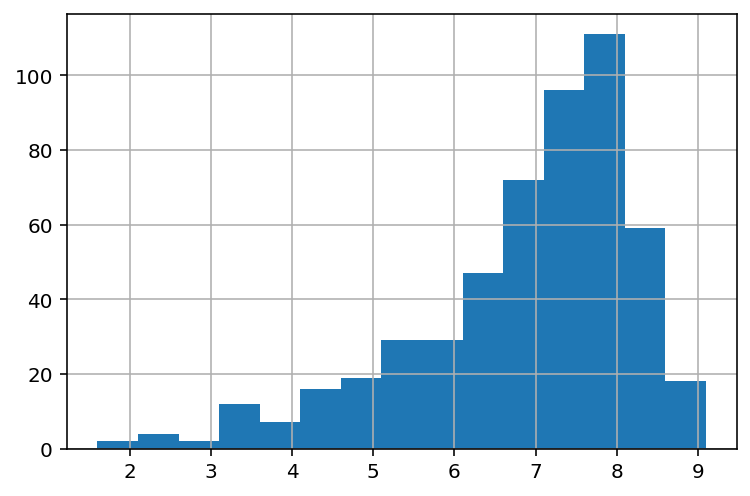

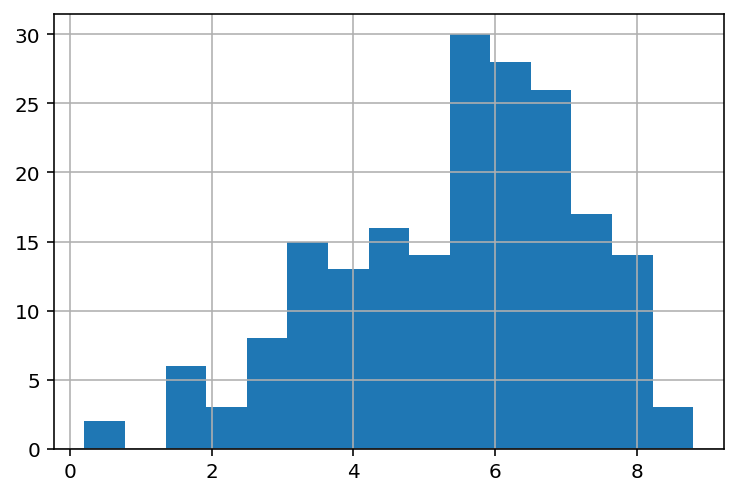

In [53]:
action.hist(bins=15)
plt.show()
sport.hist(bins=15)
plt.show()

Найдем дисперсию выборок.

In [54]:
np.var(action, ddof=1)

1.8890840494348111

In [55]:
np.var(sport, ddof=1)

3.022890298704732

Размер выборок сильно отличается: 523 и 195 значений.
Распределения также стремятся к нормальному, но смещены вправо. Дисперсии выборок отличаются.  Используем тест Стьюдента и параметр `equal_var = False` из-за разных размеров выборки и дисперсии.

In [56]:
alpha = 0.05
result = st.ttest_ind(action, sport, equal_var=False)

print('p-значение: ', result.pvalue)

if result.pvalue < alpha:
   print("Отвергаем нулевую гипотезу")
else:
   print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


**Вывод**

Судя по крайне малому значению pvalue, гораздо ниже порогового, можно с уверенностью отвергнуть нулевую гипотезу. Есть значительные основания полагать, что средние пользовательские рейтинги жанров Action и Sports отличаются.

## Общий вывод

В ходе исследования мы изучили исторические данные об игровых платформах, жанрах и пользовательских предпочтениях с целью определить потенциально самые успешные продукты для планирования рекламных кампаний на 2017 год. 

На этапе предобработки мы привели типы данных в нужный формат, исправили заголовки колонок и получили недостающую информацию - суммарные продажи игр для всех регионов. 

Определили актуальный период для прогнозирования - с 2012 по 2016 гг. В этот период на подъеме популярности находятся платформы: PlayStation 4 и Xbox One. Учитывая, что они появились в 2013 год, а пик продаж платформ приходится примерно на 4-5 год, рассматриваем эти платформы как перспективные.

Мы выявили слабую закономерность между оценками критиков и продажами. Есть некоторая вероятность, что игры с оценками критиков выше 80 будут продаваться лучше. Оценки пользователей практически не влияют на продажи.

Среди жанров к наиболее популярным можно отнести экшен игры, шутеры и  ролевые. Они популярны в разрезе мировых продаж, а также лидируют по продажам в своих регионах, но рекламные кампании нужно планировать для каждого региона отдельно, т.к. у них есть свои особенности. В Америке и Европе предпочитают экшены и шутеры, в Японии - ролевые и экшены.

Стоит обратить внимание на рейтинги игр, в Америке и Европе лучше продаются игры с рейтингом «M» («Mature»), а в Японии лидируют игры с неопределенным рейтингом, информацию об этом стоит уточнить. Также в Японии популярны игры категории «E» («Everyone») и «T» («Teen»). 

Также, по данным за актуальный период, несмотря на общий спад, в Японии самая популярная платформа - 3DS. В Европе больше предпочитают Play Station, в Америке - Xbox.

Мы проверили гипотезу о средних пользовательских рейтингах платформ Xbox One и PC и пришли к выводу, что с большой вероятностью их можно считать одинаковыми.

Также мы проверили и приняли гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports отличаются. 
